<a href="https://colab.research.google.com/github/xiaoxuan716/Python_review/blob/main/MidTerm_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
492/(492+192)

0.7192982456140351

Dummy Variables/ Log Transformation : https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S05_Data_Preprocessing/S05_InClass_Exercises_Solution.ipynb#scrollTo=hsAh6eHGwHqB


**O. List, Tuple, DIc** https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S03_Data_Structures_1/03_Lecture_Example1_Intro_Structures.ipynb#scrollTo=MzZyU3KN3zaN


1.   List Comprehension : 

l1 = [1.5, 2.4, 2.0, 3.0]
l2 = [100, 200, 150, 400]
n_elements = len(l1) # get the length of the list
revenue = [l1[i]*l2[i] for i in range(n_elements)] 

    # total revenue for each product for price > 2
revenue_p2 = [l1[i]*l2[i] for i in range(n_elements) if l1[i] > 2] 

2.  Loop # which is the same as using the for and if statement as follows
revenue_p2_loop = []
for i in range(n_elements):
  if l1[i] > 2:
    revenue_p2_loop.append(l1[i]*l2[i])


3.  Loop + lIst comprhension : https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S03_Data_Structures_1/03_Lecture_Example2_SC_examples.ipynb#scrollTo=vpz3ltIMjzTy

def xxx(forecast, real_demand):

    sum_mse = 0

    n_periods = len(forecast) # get the number of periods from the list

    for t in range(n_periods):
        sum_mse += (real_demand[t] - forecast[t]) ** 2
    return sum_mse/n_periods

如果直接使用list comprehension: 
mse_t = [(real_demand[t] - forecast[t]) ** 2 for t in range(n_periods)] 
    return sum(mse_t)/n_periods 




**A. Pandas** https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S04_Data_Structures_2/S4_LectureEx_Notebook_with_Code.ipynb#scrollTo=phkymq0UCFTR
1.  import pandas as pd

pd.DataFrame({'Yes':[50, 21], 'No':[131, 2]})

2.  提取数据 返回一个Seriesz只有一个[]/DataFrame 有两个[[]]：iloc & loc如果只有一个parametre代表提取行，两个行and列
https://blog.csdn.net/W_weiying/article/details/81411257

a)index-based selection, i.e., the iloc[row_number, col_number]

df.iloc[0,2]  # 1 row 3 col  

b)Label-based selection 
df.loc[0,'UPC']  OR   df.at[0, 'UPC']

3.  返回 True False 从而可以sum（）
        
    df.P1_Ending_Inv<0
    
    sum(df.P1_Ending_Inv<0)

3.  Repalce 文字： 

df['NewColumn'] = df.NewColumn.replace("Unavailable", 'Kwik-E-Mart')


4.  重命名 index  & cols names 
    df.rename(columns={'WEEK_END_DATE': 'END_DATE'}) 

    df.rename(index={0:'First row', 1:'Second row'})
        #### Note that the resulting DataFrame is not assigned back to the original one if we don't indicate df = ...

4.  Plotting data： https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S04_Data_Structures_2/S4_LectureEx_Notebook_with_Code.ipynb#scrollTo=bL9JgvleCFTp
Plotting methods allow for the default line plot a handful of plot styles. These methods can be provided as the kind keyword argument to plot(), and include:

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or ‘density’ for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

如何提取行&列
single_prod_df = df.loc[(df.UPC == 1111085319)][['UNITS', 'VISITS', 'WEEK_END_DATE']]
single_prod_df = single_prod_df.set_index('WEEK_END_DATE')
single_prod_df.plot()

**A. Pandas**

1.  如何**复制**一个copy dataframe : 
df_SC = df_SC[selected_columns].copy() 
df.copy()  # we make a copy of this to avoid any issue
*** Same thing for the List : l2=l1[:] or l2=l1.copy()
2.   df.columns.str.replace("_","")  用后替换前

2.   df.dtypes : 不用括号show the type of data in our DataFrame, object means string or mixed ; int; float ; datetime 如果日期type不对记得更改
2.   Transform [date] and [numerical] data **pandas.to_datetime/to_numeric()** # errors="coerce" 可以将无法正确转换的直接写为NaN
3.   查看**missing** df.isna().sum().sum()

     原理：df[['NewColumn']].isnull() # the new column return True，当我们计算sum 将会计算有多少个true  
     
     将某一列null值提取出来df_SC['line_item_insurance_usd'].isna() == True
     
    替换NaN ==> Replacing missing values with 0 : 
    df_crops.fillna(0, inplace=True)  

只改某一列：df_SC.fillna(value={'col1': 'missing'}, inplace=True)

    Remove rows with NaN (Hint: you can use df = df.dropna(axis='rows')

4.   筛选行： df[(cond1)&（(cond2)|(cond2）)]  OR df.loc[cond1 & cond2]

     筛选列： df[["a","b"]]  <==返回Dataframe； 如果 df.col1/df["col"]==> 返回series结果

     两个一起筛选df[['col1','col2']][df['col2'].isna() == True]
5.   df.groupby(...).agg(...) allows us to aggregate each column differently
    
     df.groupby(["",""]).col.mean()

     df.groupby(["salesorder_id"])[["line_total"]].sum()

6.   Min-max normalization and Z-score normalization

7.   如何在DF中加入一列 # we now modify the ID a bit and put in the format of 'SKU0000'
codes = ["SKU"+'{:04d}'.format(i) for i in codes] # ListComprehension 制造出一列

df_SC.insert(6,'item_id',codes)  #将codes 插入进DF中第6列 命名id

如何删除一列： df_WT = df_WT.drop(columns='>26-30_weeks')   






In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S05_Data_Preprocessing/Supply_Chain_Shipment_Pricing_Data.csv'
df_SC = pd.read_csv(url)  # reading data file into a DataFrame

# 1.replace
df_SC.columns = df_SC.columns.str.replace(' ', '_')
df_SC.columns = df_SC.columns.str.replace('(', '')
df_SC.columns = df_SC.columns.str.replace(')', '')
df_SC.columns = df_SC.columns.str.replace('#', ''
)
df_SC.columns = df_SC.columns.str.replace('/', '')

# 2.Transform data type
df_SC['pq_first_sent_to_client_date'] = pd.to_datetime(df_SC['pq_first_sent_to_client_date'], errors='coerce')
df_SC['scheduled_delivery_date'] = pd.to_datetime(df_SC['scheduled_delivery_date'], errors='coerce')
df_SC['delivered_to_client_date'] = pd.to_datetime(df_SC['delivered_to_client_date'], errors='coerce')
df_SC['weight_kilograms'] = pd.to_numeric(df_SC['weight_kilograms'], errors='coerce')
df_SC['freight_cost_usd'] = pd.to_numeric(df_SC['freight_cost_usd'], errors='coerce')
# df1["product_id"]=df1["product_id"].apply(str)
# 将int转换成str

# 3.查看 missing value
df_SC.isna().sum()
df_SC.isna().sum().sum() # 查看总共缺少多少 

# 4.筛选数据 只要不为NaN的数 choose only non-missing data and data after 2010
df_SC = df_SC[(df_SC['freight_cost_usd'].notna()) & (df_SC['weight_kilograms'].notna()) & (df_SC['delivered_to_client_date'] >= '2010-01-01')]
selected_columns = ['country', 'line_item_value','weight_kilograms','freight_cost_usd']
df_SC[selected_columns].isna().sum() #查看筛选cols是否还存在missing 

# 5. df.groupby(...).agg(...) allows us to aggregate each column differently
# df.groupby('UPC_string').UNITS.sum()
df_SC_selected=df_SC[selected_columns].groupby('country').agg({'line_item_value':'sum','weight_kilograms':'mean','freight_cost_usd':'mean'})
print(df_SC_selected.head(5))

# 6. Normalization Z-score (i - i.mean)/i.std 加在末尾 自动 加入【格式化列名】
for col in df_SC_selected.columns:  # for col in ['Production', 'Yield']:
    df_SC_selected['z_'+col] = (df_SC_selected[col] - df_SC_selected[col].mean())/df_SC_selected[col].std() # add the new z-norm column
    df_SC_selected[col + '_norm'] = (df_SC_selected[col] - df_SC_selected[col].min())/(df_SC_selected[col].max() - df_SC_selected[col].min())   # add the new normalized column
print(df_SC_selected.head(5))
# .describe()


             line_item_value  weight_kilograms  freight_cost_usd
country                                                         
Afghanistan          1736.00         44.500000        540.525000
Angola             181600.00        362.200000       6166.414000
Benin              545480.52       2323.600000      11638.258000
Botswana          1303710.71        525.766667       3451.025333
Burundi           2277173.52        512.750000       5572.184286
             line_item_value  ...  z_freight_cost_usd
country                       ...                    
Afghanistan          1736.00  ...           -1.250062
Angola             181600.00  ...           -0.499511
Benin              545480.52  ...            0.230490
Botswana          1303710.71  ...           -0.861771
Burundi           2277173.52  ...           -0.578787

[5 rows x 6 columns]


**A. Pandas**


1.   df.parse_dates(""):将某列解析为时间索引 ；df.set_index("") 将某列设置为索引,如果不设置，df会自动生成一个索引序列
1.   List comprehension创建新的 col在dataframe中
2.   Dataframe 中 df[:3] 打印前三行 0，1，2
 
 df.columns[:3] 提取前三列的名称 Index(['aa', 'bb', 'cc'], dtype='object')
 
 df[ [ "a","b","c" ] ] 打印abc列 & item  df[df.columns[:3]]打印前三列
2.   利用pd.DataFrame() 把groupby的数据转成DF格式
1.   df可以sort_values(by="",ascending=True/False,inplace=True) # inplace = True 将得到的值计算得到的值覆盖之前的值






In [ ]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S06_Descriptive_Analytics/salesCerealsOriginal.csv'
# 1.将该列转化为 datetime
#  since the value is in `datetime` format. We can obtain it by using the attribute `.month`
df_cereal = pd.read_csv(url, parse_dates=['WEEK_END_DATE']) 
# 自定义index 是什么
df_cereal.set_index('WEEK_END_DATE', inplace=True)

# 2.创建新 col 用list comprehension
df_cereal['UPC_string'] = ["UPC"+str(x) for x in df_cereal['UPC']]

# 4-5.pd.DataFrame()转化
pd.DataFrame(df_cereal.groupby('UPC_string').UNITS.sum())
# we also sort the values by unit
agg_units.sort_values(by='UNITS', ascending=False, inplace=True)

**A. Pandas**
1.   df.describe() ： show descriptive statistics of the **numerical data** 理应在查看更改玩type后
2.  df.dtypes ： 不需要加（）
3.  df["size"].value_counts() shows a list of unique values and how often they occur in the dataset
4.  df["size"].unique()shows a list of unique values
    
3.  df.columns[:] : 可以筛选col in DF

df_WT.columns ==》 显示index所有的col names

for col in df_WT.columns[-7:]:
  df_WT[col] = pd.to_numeric(df_WT[col], errors='coerce', downcast='float')

df_WT[df_WT.columns[-7:]] = df_WT[df_WT.columns[-7:]].fillna(0)

4. Compute Values for a new col: 

   创建一个新col 结合 原有的col，利用df.loc[i,col] + list comprehension ： 

简单版： df['newtip'] = df.tip+1

df_WT['>26-52_weeks'] = [max(df_WT.loc[i,'>26-52_weeks'], df_WT.loc[i,'>26-30_weeks']) for i in df_WT.index]

**df['REBATE_PERC_V2'] = [(df.at[i,'BASE_PRICE'] - df.at[i,'PRICE']) / df.at[i,'BASE_PRICE']  if df.at[i,'FEATURE'] == 1 else 0 for i in df.index]**

和function def一起用：
bass_df['ft'] = [function(p, q, t) for t in bass_df.index]


5. Plot: 
inv_dataframe[["Ending_Inv"]].plot(kind='bar')   # plotting inv levels
inv_dataframe[["Receipt","Ending_Inv"]].plot(kind='bar', figsize=(15,3))   # plotting inv and receipts and resize the plot
inv_dataframe[['Ending_Inv']].plot.hist()


**B. Seaborn**
所有可视化examples: https://blog.csdn.net/weixin_41466575/article/details/104343245

具体link： https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S06_Descriptive_Analytics/S06_LectureEx_Data_Visualization.ipynb#scrollTo=9Vr83JSozKuS

1.   Seaborn 一般和matplotlib (plt)一起工作：用plt.figure(figsize=(14, 6)）& plt.title('来setteing')；
    
    用sns作图；作图前需要先筛选数据 + 转成DF + sort_values
2.   可以利用 parameters更改样式

hue: differentiates each line with a different colour shade, huge="UPC" 

size: differentiates each line with a different weight (e.g., 1pt, 1/2 pt)

color="green"

style: differentiates each line with a different style (e.g., solid, dashed, dot)

3. sns.**lineplot**(data=df_cereal, x='WEEK_END_DATE', y='UNITS')

   sns.**barplot**(y=agg_units.index, x=agg_units["UNITS"], color = 'grey')

   sns.**scatterplot**(data=df_cereal, x='MARKDOWN', y='UNITS')  # # , hue='FEATURE'）

   sns.**distplot**(a=df_cereal['MARKDOWN']) # DIstribution Plot

   sns.**jointplot()**

   sns.**heatmap**(data=df_cereal_pivot, annot=True, fmt='d', cmap='Oranges')
** HeatMap 1)data=df_cereal.corr() 计算correlation 

           2)普通的 groupby - DF - PivotTable - HeatMap

4.  g=sns....

    *g.set(ylabel = 'Tonnes', xlabel = 'Year')*    
  
    setting the label name for each axis * 而不用最初的var的名字

    g.set(xlabel='Hectares', ylabel='Tonnes', title='Area harvested (ha) vs. Production (tonnes)') # setting names to the axes labels 

    *plt.legend*(title='Products')   ： 需要hug首先然后modify the default title of the legend


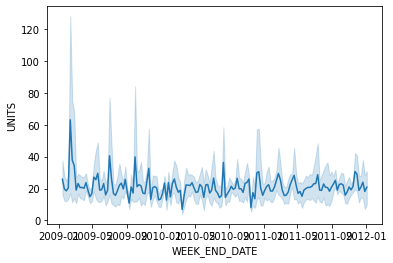

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title('Number of units sold and markdown in percentage')
sns.lineplot(data=df_cereal, x='WEEK_END_DATE', y='UNITS') 

**C. Descriptive Analysis: Clustering** --- （a）Kmeans 

1.   首先 normalazation 正则 
2.   K-Means clutering algorithm ：使用常用的软件包scikit-learn应用。 函数sklearn.cluster.KMeans（...）返回一个提供多个输出的对象。 主要输出是.labels_（请注意，这是该方法提供的特定属性名称），它返回包含所有数据点的群集标签的列表。 为了从数据中学习/确定标签，我们还需要调用.fit（X）来将输入变量X（我们的z得分标准化变量）传递给方法。
3.   具体link： https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S06_Descriptive_Analytics/S06_LectureEx_Data_Analytics.ipynb#scrollTo=U6TH8BJPQLoj

**C. Clustering** --- （b）Hierarchical clustering 层次聚类

在某些情况下，我们必须创建集群/组的层次结构，而不仅仅是一个级别的集群，以允许不同级别的聚合和分解（例如，产品/客户层次结构）。 聚集聚类是一种常用的方法，可以用来确保聚类的这种层次一致性。

具体link : https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S06_Descriptive_Analytics/S6_AfterClass_Exercises_Solution.ipynb#scrollTo=RbKRRSa2amNI


**如何optimal**
优化了集群内平方和optimizes the within-cluster sum of squares. 

Kmeans：Inertia or sum-of-square (SSE) within the cluster: This one measure the compactness of each cluster. 

Silhouette value: This one represents how well the clusters are separated from each others .





In [ ]:
### start your code here ### 
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering

X = df_SC_selected[z_columns]#选择正则化过的features 

kmeans_object = sklearn.cluster.KMeans(n_clusters=3, random_state=0)
kmeans_object.fit(X) 
df_SC_selected['K3_cluster'] = kmeans_object.labels # 创建新的一列在末尾 显示 分组类别